In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from NLP_utils import *
import numpy as np

In [2]:
import pandas as pd

df = pd.read_csv("final_with_LSP.csv")
titles = df["title"].unique()

In [3]:
titles

array(['광작(廣作)', '귀향(歸鄕)', '금방울전(金鈴傳)', '김원전(金圓傳)', '까치전',
       '박씨전 (고대본)(朴氏傳)', '박씨전(朴氏傳)', '방한림전(方翰林傳)', '배비장전(裵裨將傳)', '비부(婢夫)',
       '서동지전(鼠同知傳)', '숙영낭자전(淑英娘子傳)', '숙향전(淑香傳)', '안동랑(安東郞)',
       '열녀춘향수절가(烈女春香守節歌)', '영영전(英英傳)', '옥단춘전(玉丹春傳)', '옹고집전(壅固執傳)', '우마마',
       '운영전 (국립도서관본)(雲英傳)', '임진록(壬辰錄)', '장경전 (경판25장본 대영박물관소장)(張景傳)',
       '장끼전(雄雉傳)', '장백전(張伯傳)', '장화홍련전', '정수정전 (경판16장본)(鄭秀貞傳)',
       '최고운전(崔孤雲傳)', '콩쥐팥쥐전', '토끼전', '토생전 (경판본)(兎生傳)', '현수문전 (경판본)(玄壽文傳)',
       '홍계월전(洪桂月傳)'], dtype=object)

In [7]:
plt.rc('font', family='Malgun Gothic')

In [4]:
sample_titles = ['열녀춘향수절가(烈女春香守節歌)', '토생전 (경판본)(兎生傳)', '콩쥐팥쥐전', '장화홍련전', '배비장전(裵裨將傳)']

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def LSP_plot(df, title):
    LSP_score = df.loc[df["title"] == title, "LSP_score"]
    plt.figure(figsize=(16,6))
    sns.barplot(x=np.arange(len(LSP_score)), y=LSP_score)
    plt.xticks([])
    plt.title(f"< {title} >", fontsize=20)
    plt.xlabel("Scene #")
    plt.ylabel("LSP Score")
    plt.show()

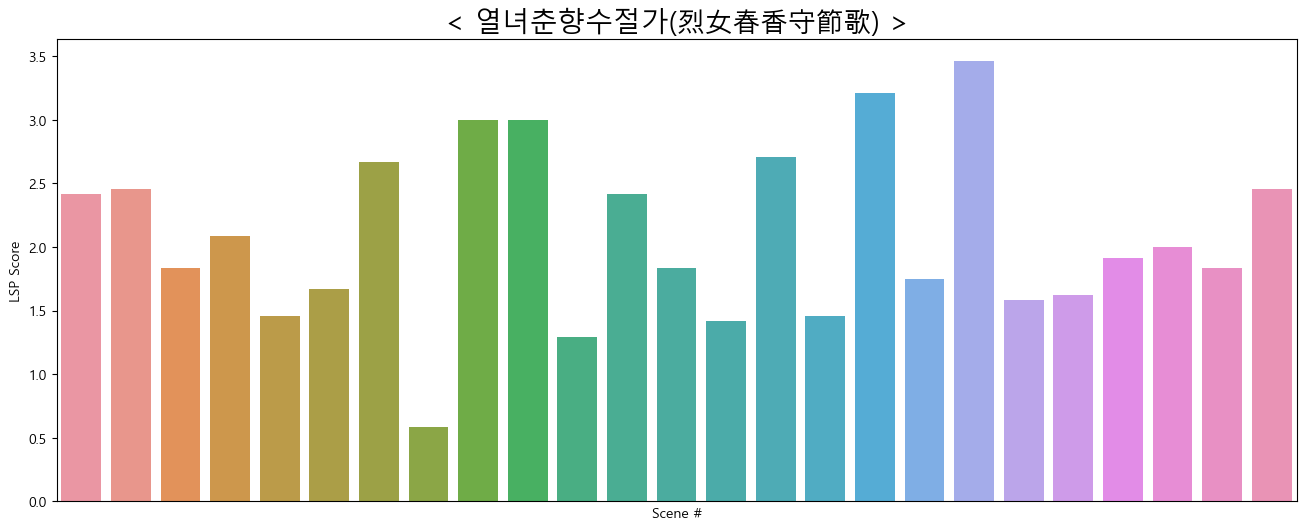

In [11]:
LSP_plot(df, sample_titles[0])

In [17]:
LSP_score

276    2.416667
277    2.458333
278    1.833333
279    2.083333
280    1.458333
281    1.666667
282    2.666667
283    0.583333
284    3.000000
285    3.000000
286    1.291667
287    2.416667
288    1.833333
289    1.416667
290    2.708333
291    1.458333
292    3.208333
293    1.750000
294    3.458333
295    1.583333
296    1.625000
297    1.916667
298    2.000000
299    1.833333
300    2.458333
Name: LSP_score, dtype: float64

In [28]:
import json

def extract_top_k_worst_k(df, title, results, k=3):
    df_sub = df.loc[df["title"] == title]
    df_sub_idx = df_sub.index

    LSP_score = df.loc[df_sub_idx, "LSP_score"]
    IntScore = df.loc[df_sub_idx, "IntScore"]
    CvScore = df.loc[df_sub_idx, "CvScore"]
    SvScore = df.loc[df_sub_idx, "SvScore"]
    PropScore = df.loc[df_sub_idx, "PropScore"]

    sorted_indices = np.argsort(LSP_score)

    # 높은 점수 순으로 상위 k개의 인덱스
    top_k_high_indices = sorted_indices[-k:][::-1]

    # 낮은 점수 순으로 하위 k개의 인덱스
    worst_k_low_indices = sorted_indices[:k]

    for i, top in enumerate(top_k_high_indices):
        data = {
        "Rank": f"Top-{i+1}",
        "Scene": f"Scene #{top}",
        "LSP_score": round(LSP_score[df_sub_idx[top]], 4),
        "IntScore": round(IntScore[df_sub_idx[top]], 4),
        "CvScore": round(CvScore[df_sub_idx[top]], 4),
        "SvScore": round(SvScore[df_sub_idx[top]], 4),
        "PropScore": round(PropScore[df_sub_idx[top]], 4),
        "sentence": df.loc[df_sub_idx[top], "quote_dup_fixed"]
        }
        if title not in results:
            results[title] = []
        results[title].append(data)
    
    for i, worst in enumerate(worst_k_low_indices):
        data = {
        "Rank": f"Worst-{i+1}",
        "Scene": f"Scene #{worst}",
        "LSP_score": round(LSP_score[df_sub_idx[worst]], 4),
        "IntScore": round(IntScore[df_sub_idx[worst]], 4),
        "CvScore": round(CvScore[df_sub_idx[worst]], 4),
        "SvScore": round(SvScore[df_sub_idx[worst]], 4),
        "PropScore": round(PropScore[df_sub_idx[worst]], 4),
        "sentence": df.loc[df_sub_idx[worst], "quote_dup_fixed"]
        }
        if title not in results:
            results[title] = []
        results[title].append(data)
    
    return results

In [29]:
results = {}

for title in sample_titles:
    results = extract_top_k_worst_k(df, title, results)

In [30]:
# JSON 문자열로 변환
json_result = json.dumps(results, indent=4, ensure_ascii=False)
print(json_result)

{
    "열녀춘향수절가(烈女春香守節歌)": [
        {
            "Rank": "Top-1",
            "Scene": "Scene #18",
            "LSP_score": 3.4583,
            "IntScore": 0.8333,
            "CvScore": 1.0,
            "SvScore": 0.8333,
            "PropScore": 0.7917,
            "sentence": "죽창문을 열어보니 아름다운 달빛이 방 안으로 들어왔지만, 어린 아이가 홀로 앉아 달을 보며 묻는 말이 있었어. \"저 달아. 보느냐. 님 계신 데 명기 빌려라. 나도 보게야. 우리 님이 누웠더냐 앉았더냐 보는 대로만 네가 일러 나의 속마음 풀어다오.\" 애고 애고 설이 울다 홀연이 잠이 들니 비몽사몽간에 호접이 장주 되고 장주가 호접 되어 세우같이 남은 혼백 바람인 듯 구름인 듯 한 곳을 당도하니 천공지활하고 산령수려한데 은은한 죽림간에 일층 화각이 반공에 잠겼거늘 대체 귀신 다니는 법은 대풍기하고 승천입지하니 침상편시춘몽중에 행진강남수천리라. 전면을 살펴보니 황금대자로 만고정렬황릉지묘라 뚜렷이 붙였거늘 심신이 황홀하여 배회터니 천연한 낭자 셋이 나오는데 석숭의 애첩 녹주 등총을 들고 진주 기생 논개, 평양 기생 월선이라. 춘향을 인도하여 내당으로 들어가니 당상에 백의한 두 부인이 옥수를 들어 청하거늘 춘향이 사양하되. \"진정한 세상에서 천첩의 높이를 어떻게 황제의 묘소에 오를까.\" 부인이 특별히 여겨 한번 더 청하거늘 예의에 어긋나지 않게 올라가니 좌를 주어 앉힌 후에 \"네가 춘향이냐? 정말 기특하구나. 전에 문서를 확인하러 요지연에 올라갔을 때, 네가 보고 싶다는 간절한 마음으로 너를 부탁했는데, 정말 불안하구나.\" 춘향이 재배주에게 왈했다. \"첩이 비록 무식하나 옛서적을 보고 나중에 존경을 받을 수 있을까 하였더니 이렇게 황제의 부인인 황후를 모시니

In [ ]:
# JSON 파일로 저장
with open('top_worst_5_samples.json', 'w', encoding='utf-8') as f:
    json.dump(results, f, indent=4, ensure_ascii=False)